In [43]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from csge import CoopetitiveSoftGatingEnsemble as CSGE
from csge import utils
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Global weighting

In [137]:
class f1:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X), [-1])
class f2:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X) + 10, [-1])

In [138]:
def g(x, offset):
    return np.sin(x) + offset

In [139]:
x_axis = np.arange(-2*np.pi, 2*np.pi, 0.1)
x_axis = np.reshape(x_axis, [-1, 1])
targets = g(x_axis, 4)
targets = np.reshape(targets, [-1, 1])

In [140]:
model = CSGE([f1, f2], error_function=mean_absolute_error)
model.eta = [1, 0, 0]
model.fit(x_axis, targets)

In [141]:
y0 = model.predict(x_axis)
y1 = f1().predict(x_axis)
y2 = f2().predict(x_axis)

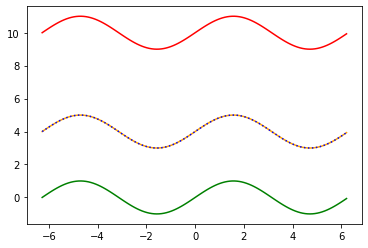

In [143]:
plt.plot(x_axis, y0, c='orange')
plt.plot(x_axis, y1, c='green')
plt.plot(x_axis, y2, c='red')
plt.plot(x_axis, targets, 'b:')

# Local weighting

In [144]:
class f1:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X), [-1])
class f2:
    def fit(self, X, y):
        return
    def predict(self, X):
        return np.reshape(np.sin(X) + 10, [-1])

In [145]:
def g(x):
    res = []
    for val in x:
        offset = 0
        if val<= 15 and val>10:
            offset = 10
        res.append(np.sin(val) + offset)
    return np.array(res)

In [146]:
x_axis = np.arange(0, 20, 0.1)
x_axis = np.reshape(x_axis, [-1, 1])
targets = g(x_axis)
targets = np.reshape(targets, [-1, 1])

In [159]:
model = CSGE([f1, f2], error_function=mse)
model.eta = [0, 3.5, 0]
model.fit(x_axis, targets)

In [160]:
y0 = model.predict(x_axis)
y1 = f1().predict(x_axis)
y2 = f2().predict(x_axis)

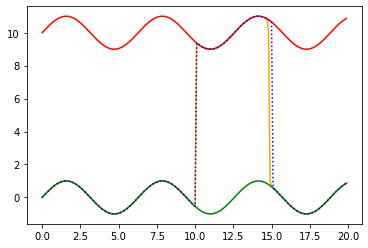

In [161]:
plt.plot(x_axis, y0, c='orange')
plt.plot(x_axis, y1, c='green')
plt.plot(x_axis, y2, c='red')
plt.plot(x_axis, targets, 'b:')